In [1]:
import tensorflow as tf


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,Activation
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
mnist=tf.keras.datasets.mnist

In [4]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()


In [5]:
xtrain.shape

(60000, 28, 28)

In [6]:
xtest.shape

(10000, 28, 28)

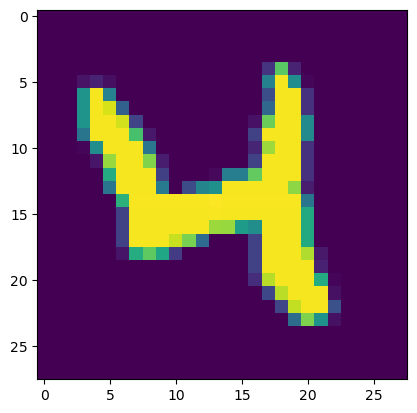

In [7]:
plt.imshow(xtrain[20])


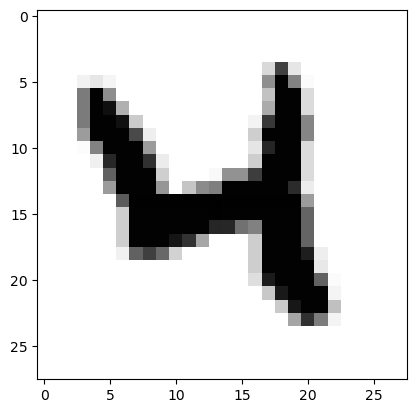

In [8]:
plt.imshow(xtrain[20],cmap=plt.cm.binary)

In [9]:
print(xtrain[2])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0
    0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   

### preprocessing

### normalisation

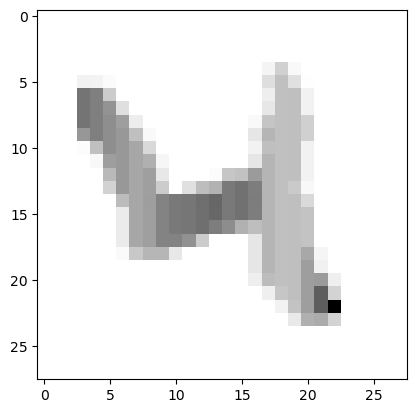

In [10]:
xtrain=tf.keras.utils.normalize(xtrain,axis=1)
xtest=tf.keras.utils.normalize(xtest,axis=1)
plt.imshow(xtrain[20],cmap=plt.cm.binary)

In [11]:
print(xtrain[24])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

### resizs

### resize the image

In [12]:
image_size=28
xtrainr=np.array(xtrain).reshape(-1,image_size,image_size,1)
xtestr=np.array(xtest).reshape(-1,image_size,image_size,1)
xtrainr.shape

(60000, 28, 28, 1)

# creating deep neural network

In [13]:
model=Sequential()



# creating first covalotion layer

model.add(Conv2D(64,(3,3),input_shape=xtrainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


# creating secong convolution layer


model.add(Conv2D(64,(3,3),input_shape=xtrainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))




# creating third convolution layer

model.add(Conv2D(64,(3,3),input_shape=xtrainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))



# fully conected layer#1

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
  

#  second fully conected layer
           
model.add(Dense(32))
model.add(Activation("relu"))
            
        
# last fully connected layer

model.add(Dense(10))
model.add(Activation("softmax"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

In [15]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])


In [16]:
model.fit(xtrainr,ytrain,epochs=5,validation_split=0.3)

Epoch 1/5


1313/1313 [==============================] - 49s 36ms/step - loss: 0.3304 - accuracy: 0.8947 - val_loss: 0.1158 - val_accuracy: 0.9636
Epoch 2/5
1313/1313 [==============================] - 47s 36ms/step - loss: 0.0992 - accuracy: 0.9695 - val_loss: 0.0780 - val_accuracy: 0.9765
Epoch 3/5
1313/1313 [==============================] - 47s 36ms/step - loss: 0.0711 - accuracy: 0.9791 - val_loss: 0.0731 - val_accuracy: 0.9783
Epoch 4/5
1313/1313 [==============================] - 50s 38ms/step - loss: 0.0561 - accuracy: 0.9820 - val_loss: 0.0638 - val_accuracy: 0.9817
Epoch 5/5
1313/1313 [==============================] - 49s 37ms/step - loss: 0.0440 - accuracy: 0.9861 - val_loss: 0.0575 - val_accuracy: 0.9816


### evaluating testing data set

In [17]:
test_loss,test_acc=model.evaluate(xtestr,ytest)
print("testloss on 10000,test samples",test_loss)
print("validation accuracy on 10000 test samples",test_acc) 

313/313 [==============================] - 4s 12ms/step - loss: 0.0564 - accuracy: 0.9824
testloss on 10000,test samples 0.05635533481836319
validation accuracy on 10000 test samples 0.9824000000953674


In [18]:
predictions =model.predict([xtestr])

313/313 [==============================] - 4s 12ms/step


In [19]:
print(predictions)

[[1.7968482e-07 1.5060759e-07 1.7272901e-05 ... 9.9995708e-01
  1.1147551e-08 4.7170317e-07]
 [3.0317009e-05 7.7618379e-06 9.9987769e-01 ... 7.0545281e-07
  1.7412822e-05 3.2355072e-09]
 [6.2575431e-08 9.9998856e-01 2.5049874e-07 ... 8.0147055e-07
  7.7124395e-07 6.1875909e-07]
 ...
 [1.8970636e-09 2.2678834e-07 5.3609326e-09 ... 2.2098301e-07
  2.4056058e-05 4.1608487e-06]
 [1.3487658e-05 1.2241849e-06 8.4042640e-08 ... 1.4137015e-09
  1.2278083e-03 2.2421441e-06]
 [4.7538560e-05 1.7587105e-07 5.0001454e-06 ... 1.5281784e-09
  4.9135237e-05 9.5490623e-07]]


In [20]:
print(np.argmax(predictions[0]))

7


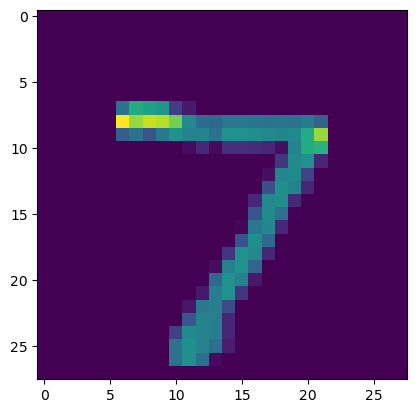

In [21]:
plt.imshow(xtest[0])

In [22]:
print(np.argmax(predictions[7]))

8


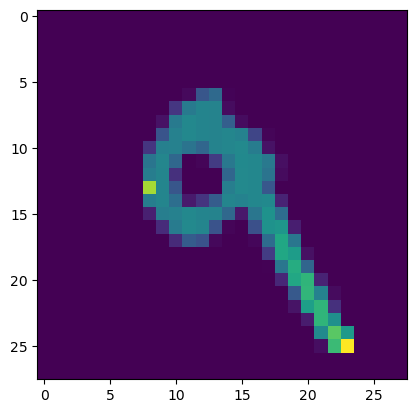

In [23]:
plt.imshow(xtest[7])

In [39]:
img=cv2.imread("Screenshot3.png")


TypeError: Image data of dtype object cannot be converted to float

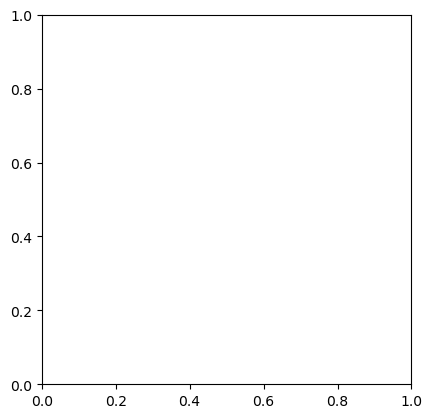

In [40]:
plt.imshow(img)
plt.show()

In [30]:
print(img.dtype)

AttributeError: 'NoneType' object has no attribute 'dtype'

In [42]:
img = np.array(img)
img = img.astype(np.float32)

In [44]:
img.shape

()

TypeError: Invalid shape () for image data

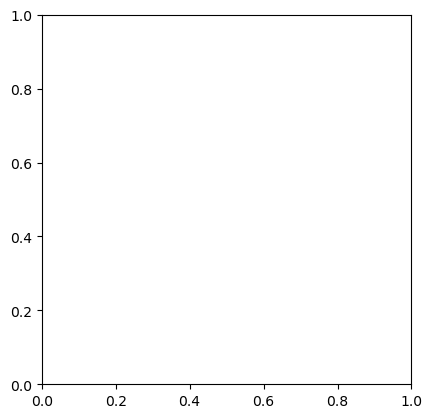

In [43]:
plt.imshow(img)
plt.show()